# Proyecto - Ingresos de adultos de EEUU

Alejandro Baltodano Madrigal, carné: 200928915

Fernando González Mata, cédula: 115400523


El conjunto de datos consta de información anónima como ocupación, edad, país de origen, raza, ganancia de capital, pérdida de capital, educación, clase de trabajo.
Podemos explorar la posibilidad de predecir el nivel de ingresos en función de la información personal del individuo.

#Importación de paquetes y dataset

**Importante** el dataset de Kaggle estaba partido en dos, venia el test y train aparte por lo que nosotros lo unimos pero no en Colab por que no nos sirve tener estaticos las particiones. Con esa union logramos 48k filas. Adjuntamos el dataset en Tec Digital para mas facilidad o sino se puede tomar del link de Kaggle pero hay que unirlos.

In [ ]:
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

name_csv = 'adult'
df = pd.read_csv(name_csv + '.csv')
df_categoricas = df.select_dtypes(include=['object','category'])
df_numericas = df.select_dtypes(include='number')

#Estadistica Descriptiva

##Vista del dataset
Generamos una pequeña vista de que compone el dataset mostrando sus primeros y ultimos 5 valores.

https://www.kaggle.com/sagnikpatra/uci-adult-census-data-dataset?select=adult_test.csv

Campos fnlwgt es el número (estimado) de personas que representa cada fila en los datos

In [ ]:
df

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


Vemos el tipo de datos que tenemos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             48842 non-null  int64  
 1   Workclass       46043 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   Education       48842 non-null  object 
 4   Education_Num   48842 non-null  float64
 5   Martial_Status  48842 non-null  object 
 6   Occupation      46033 non-null  object 
 7   Relationship    48842 non-null  object 
 8   Race            48842 non-null  object 
 9   Sex             48842 non-null  object 
 10  Capital_Gain    48842 non-null  float64
 11  Capital_Loss    48842 non-null  float64
 12  Hours_per_week  48842 non-null  float64
 13  Country         47985 non-null  object 
 14  Target          48842 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 5.6+ MB


##Resumen de los datos

In [ ]:
df_numericas.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df_categoricas.describe()

,Workclass,Education,Martial_Status,Occupation,Relationship,Race,Sex,Country,Target
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


##Histogramas
Construcción de los histogramas para cada variable

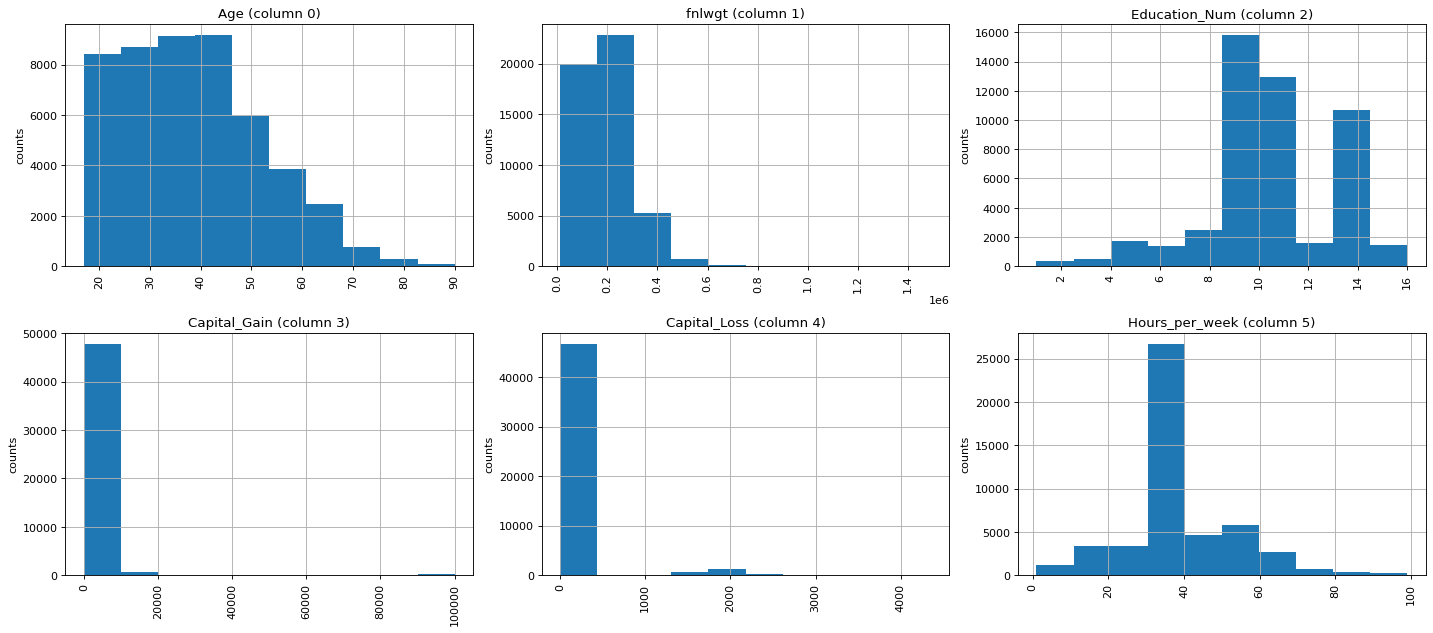

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df ]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 3 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

#dataflame, cantidad graficos, graficos por fila
plotPerColumnDistribution(df_numericas, 6, 3)

##Graficos para variables categoricas
Mostramos como esta compuestas las variables categoricas

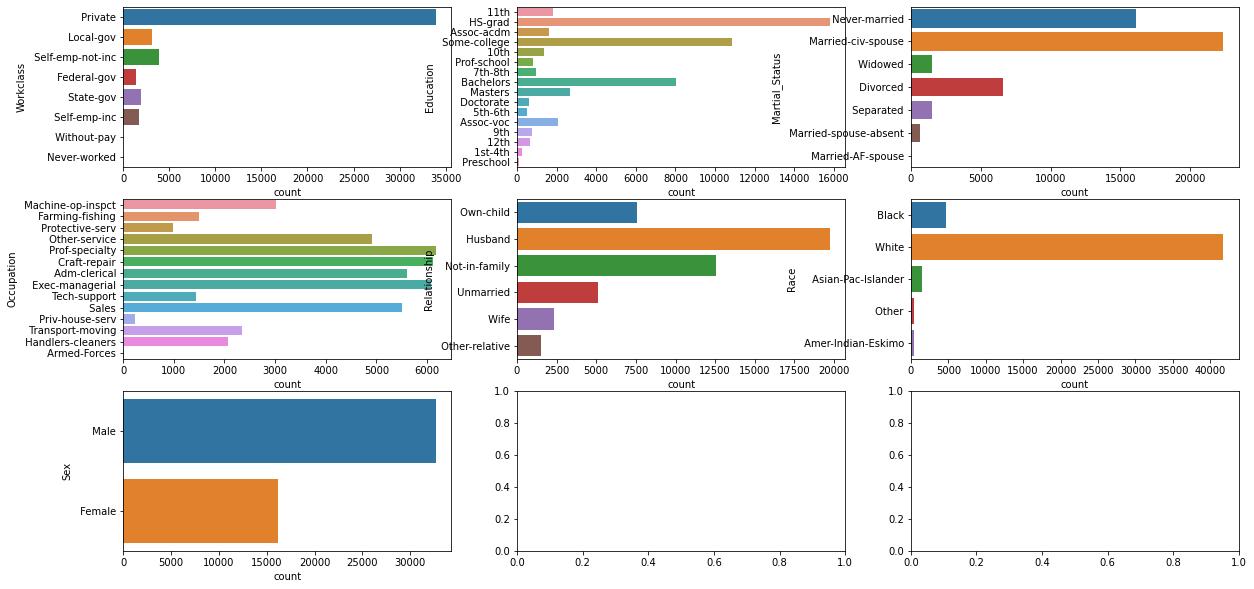

In [ ]:
def plot_multiple_countplots(df):
  cols = df.columns.values
  num_plots = len(cols)
  num_cols = math.ceil(np.sqrt(num_plots))
  num_rows = math.ceil(num_plots/num_cols)
      
  fig, axs = plt.subplots(num_rows, num_cols, figsize = (20,10))

  for ind, col in enumerate(cols):
    i = math.floor(ind/num_cols)
    j = ind - i*num_cols
    sns.countplot(y=df[col], ax=axs[i, j])

plot_multiple_countplots(df_categoricas.drop(['Target','Country'],axis=1))

Vista de la variable a predecir

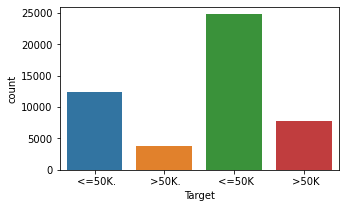

In [ ]:
countplt, ax = plt.subplots(figsize = (5,3))
ax =sns.countplot(x = 'Target', data=df_categoricas)

##Matriz de correlación
Generamos la matriz para cada variable numerica

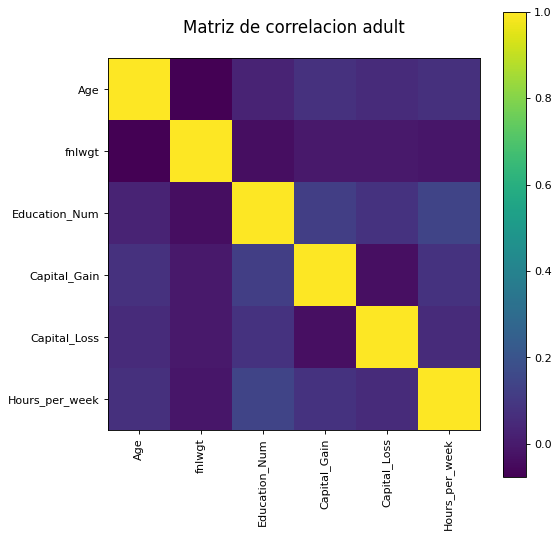

                     Age    fnlwgt  Education_Num  Capital_Gain  Capital_Loss  \
Age             1.000000 -0.076628       0.030940      0.077229      0.056944   
fnlwgt         -0.076628  1.000000      -0.038761     -0.003706     -0.004366   
Education_Num   0.030940 -0.038761       1.000000      0.125146      0.080972   
Capital_Gain    0.077229 -0.003706       0.125146      1.000000     -0.031441   
Capital_Loss    0.056944 -0.004366       0.080972     -0.031441      1.000000   
Hours_per_week  0.071558 -0.013519       0.143689      0.082157      0.054467   

                Hours_per_week  
Age                   0.071558  
fnlwgt               -0.013519  
Education_Num         0.143689  
Capital_Gain          0.082157  
Capital_Loss          0.054467  
Hours_per_week        1.000000  


In [ ]:
# Correlation matrix
pd.set_option('display.max_columns', None)

def plotCorrelationMatrix(df, graphWidth):
    filename = name_csv
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Matriz de correlacion {filename}', fontsize=15)
    plt.show()
    print(corr)

plotCorrelationMatrix(df, 7.5)

#Preprocesamiento

In [ ]:
df_pre = df

##Imputacion de datos

Buscamos los feature con valores faltantes

In [ ]:
print(df_pre.isnull().sum())
print('\n\nPorcentajes\n',df_pre.isnull().sum() / df_pre.shape[0] * 100)

Age                  0
Workclass         2799
fnlwgt               0
Education            0
Education_Num        0
Martial_Status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            857
Target               0
dtype: int64


Porcentajes
 Age               0.000000
Workclass         5.730724
fnlwgt            0.000000
Education         0.000000
Education_Num     0.000000
Martial_Status    0.000000
Occupation        5.751198
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital_Gain      0.000000
Capital_Loss      0.000000
Hours_per_week    0.000000
Country           1.754637
Target            0.000000
dtype: float64


Tenemos faltantes sobre valores categoricos por lo que lo vamos a resolver por medio de la moda

,Workclass,Education,Martial_Status,Occupation,Relationship,Race,Sex,Country,Target
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,36705,15784,22379,8981,19716,41762,32650,44689,24720


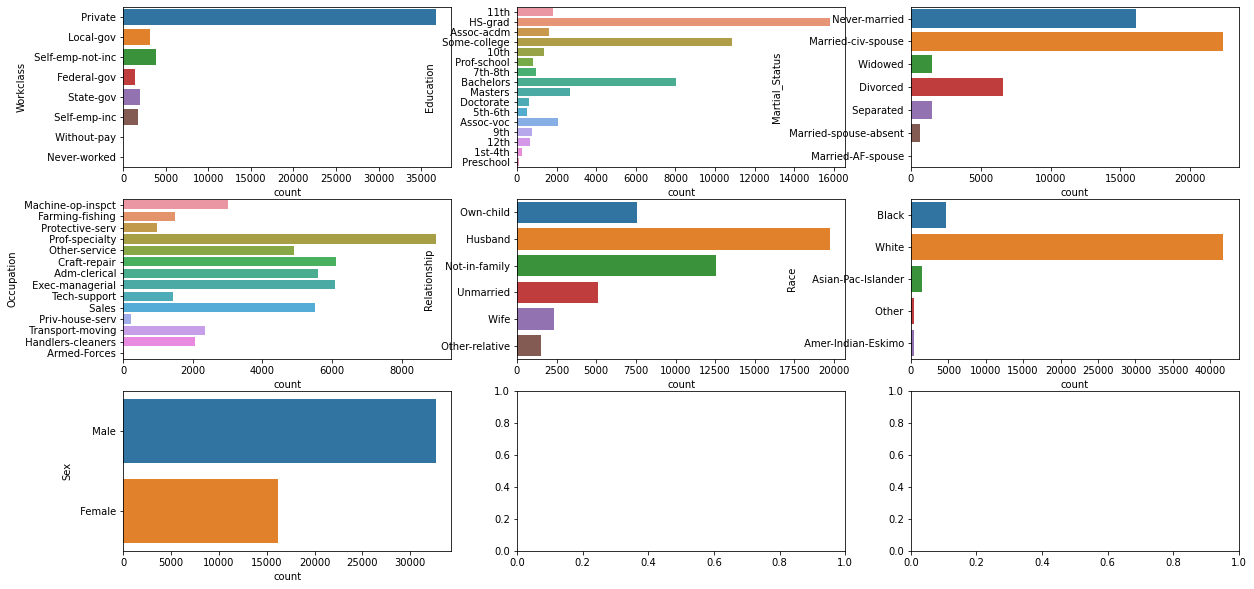

In [ ]:
imp = SimpleImputer(strategy="most_frequent")                                               #define el tipo de estrategia de imputacion
df_pre = pd.DataFrame(data = imp.fit_transform(df_pre), columns = df.columns.values)        #aplica el modelo y convierte los datos a dataflame
df_pre[df_numericas.columns] = df_pre[df_numericas.columns].astype(float)                   #datos numericos se pasan al tipo de dato correcto
df_pre['Age'] = df_pre['Age'].astype(int)                                                   #datos numericos se pasan al tipo de dato correcto
plot_multiple_countplots(df_pre[df_categoricas.columns].drop(['Target','Country'],axis=1))  #Grafica luego de imputar
df_pre.describe(exclude=[np.number])                                                        #Describe datos categoricos unicamente

##Eliminar columna duplicada.

La columna de educacion viene en formato de numero y en formato categorico por lo que se procede a eliminar la numerica

In [ ]:
df_pre.drop(['Education_Num'],inplace = True,axis=1)
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             48842 non-null  int64  
 1   Workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   Education       48842 non-null  object 
 4   Martial_Status  48842 non-null  object 
 5   Occupation      48842 non-null  object 
 6   Relationship    48842 non-null  object 
 7   Race            48842 non-null  object 
 8   Sex             48842 non-null  object 
 9   Capital_Gain    48842 non-null  float64
 10  Capital_Loss    48842 non-null  float64
 11  Hours_per_week  48842 non-null  float64
 12  Country         48842 non-null  object 
 13  Target          48842 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 5.2+ MB


##Estandarizar
Estandarizamos las varias numericas Age, fnlwgt, Capital_Gain, Capital_Loss, Hours_per_week

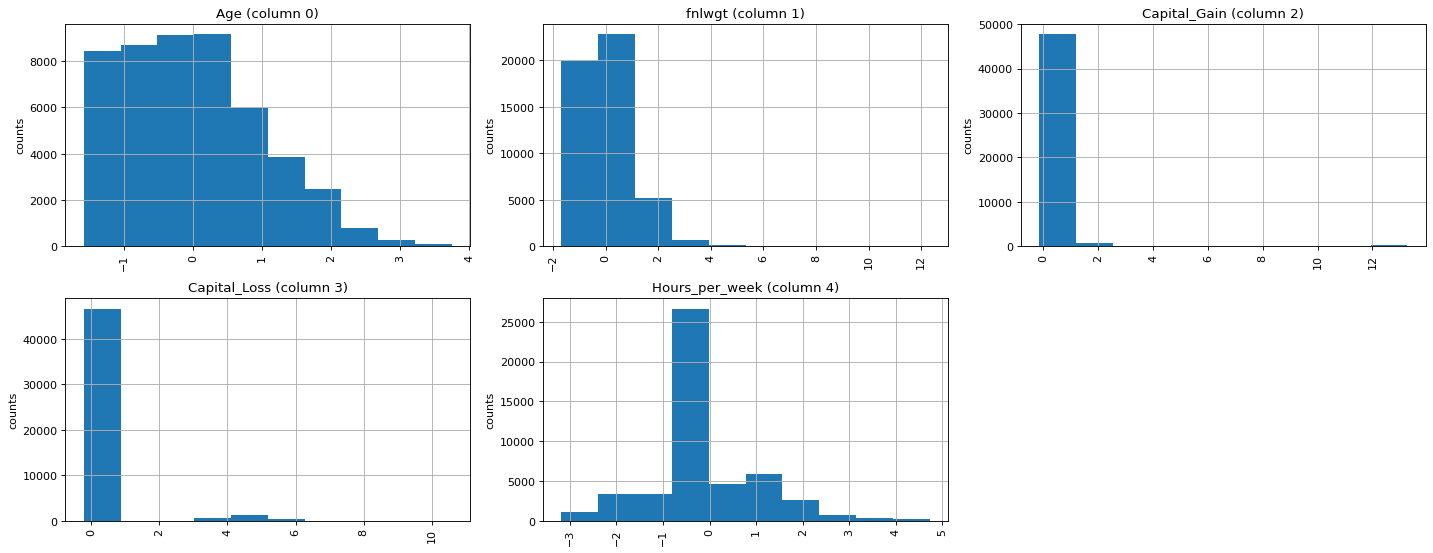

,Age,fnlwgt,Capital_Gain,Capital_Loss,Hours_per_week
count,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04
mean,1.584958e-16,-4.742349e-17,2.294458e-16,7.617582e-17,9.071110e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.578629e+00,-1.679680e+00,-1.448035e-01,-2.171271e-01,-3.181452e+00
25%,-7.763164e-01,-6.828752e-01,-1.448035e-01,-2.171271e-01,-3.408696e-02
50%,-1.198790e-01,-1.090844e-01,-1.448035e-01,-2.171271e-01,-3.408696e-02
75%,6.824334e-01,4.543232e-01,-1.448035e-01,-2.171271e-01,3.694214e-01
max,3.745808e+00,1.231723e+01,1.327438e+01,1.059179e+01,4.727312e+00


In [ ]:
scaler = StandardScaler()
standDatasetSklearn = scaler.fit_transform(df_pre.select_dtypes(include='number'))
df_pre[['Age','fnlwgt','Capital_Gain','Capital_Loss','Hours_per_week']] = standDatasetSklearn
plotPerColumnDistribution(df_pre[['Age','fnlwgt','Capital_Gain','Capital_Loss','Hours_per_week']], 6, 3)
df_pre.describe()

##Agrupar valores con mismo significado

Se agrupa solo la columna de target dado que la misma para un mismo valor viene escrito de dos formas distintas, esto se debe aque el dataset en kaggle venia separado en test y train y al unirlo nos encontramos con esto

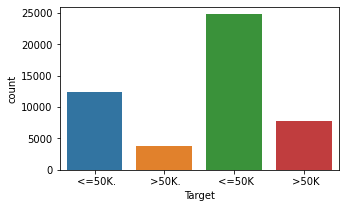

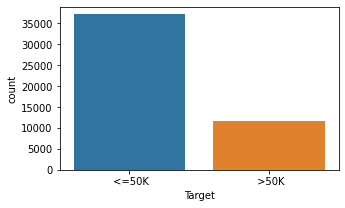

In [ ]:
countplt, ax = plt.subplots(figsize = (5,3))
ax =sns.countplot(x = 'Target', data=df)

df_pre.replace({'Target':{' <=50K.':' <=50K',' >50K.':' >50K'}},inplace=True)

countplt, ax = plt.subplots(figsize = (5,3))
ax =sns.countplot(x = 'Target', data=df_pre)

##Codificacion de valores categoricos

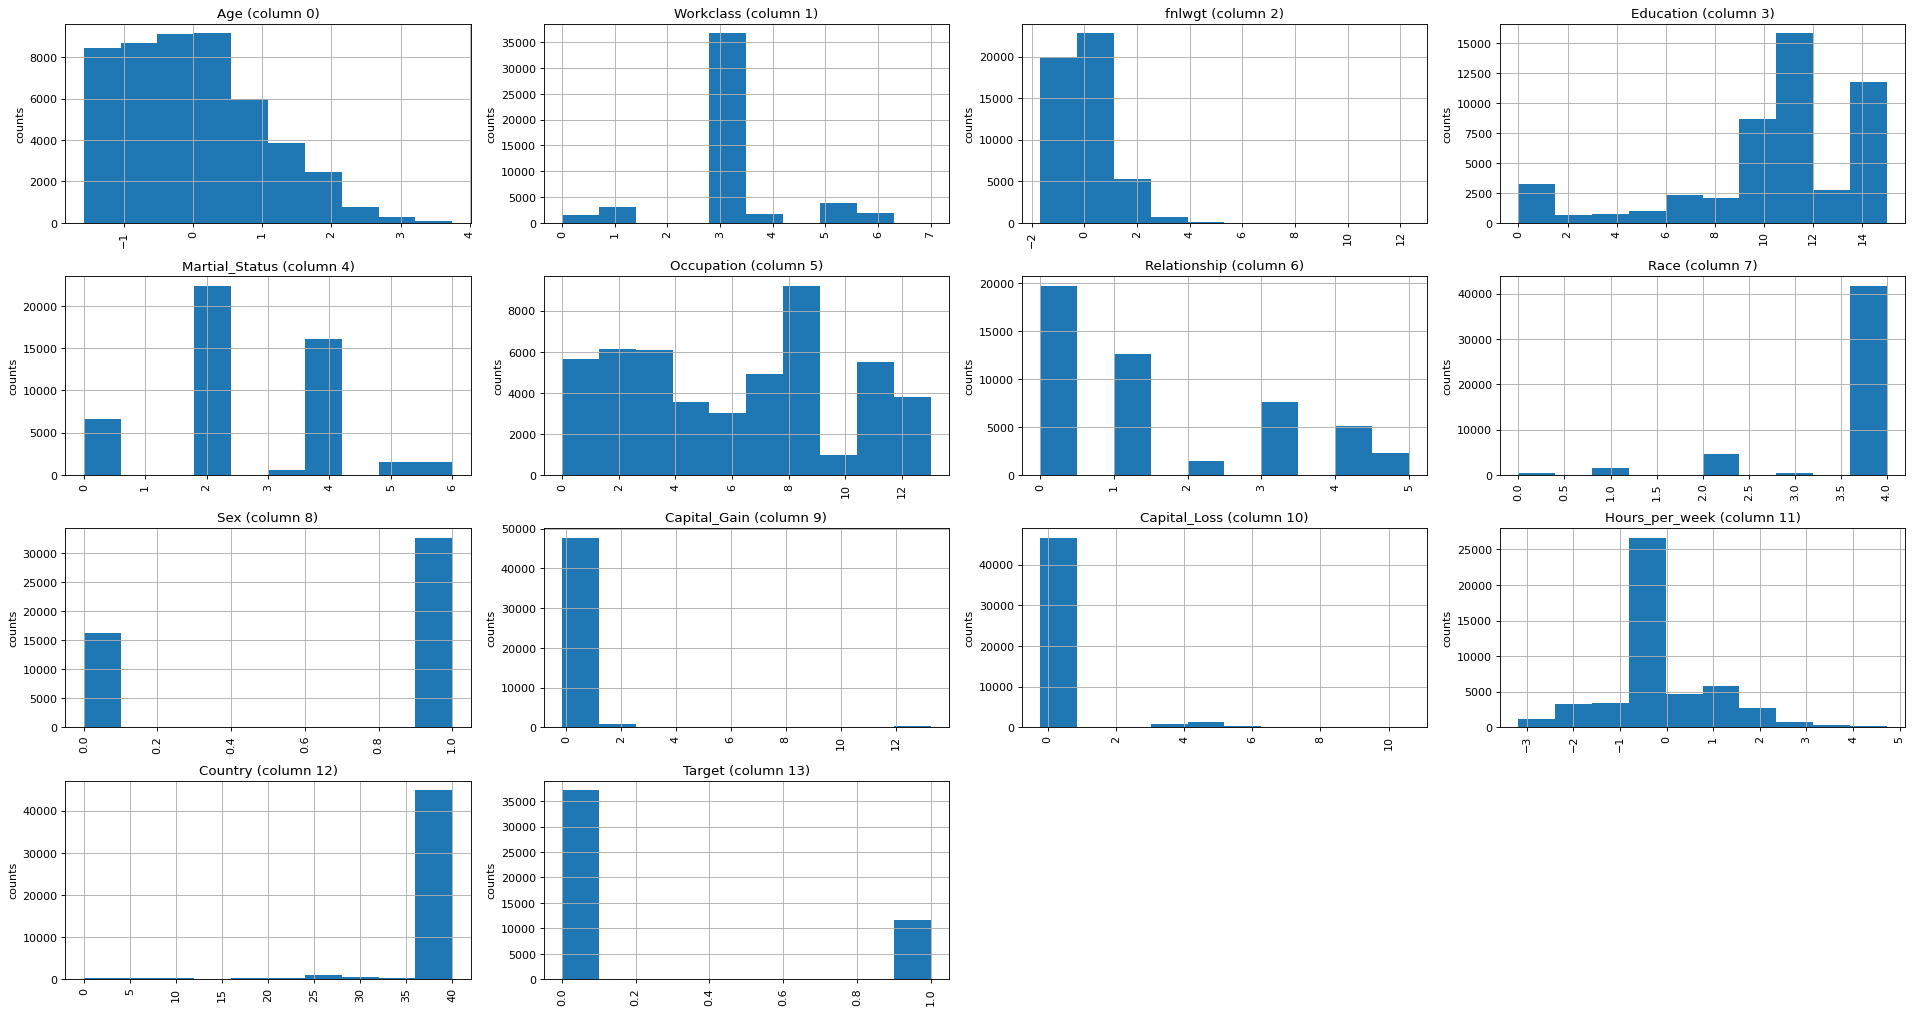

,Age,Workclass,fnlwgt,Education,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
count,4.884200e+04,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,4.884200e+04,4.884200e+04,4.884200e+04,48842.000000,48842.000000
mean,1.584958e-16,3.099668,-4.742349e-17,10.288420,2.618750,6.152819,1.443287,3.668052,0.668482,2.294458e-16,7.617582e-17,9.071110e-17,36.433664,0.239282
std,1.000010e+00,1.110810,1.000010e+00,3.874492,1.507703,3.968837,1.602151,0.845986,0.470764,1.000010e+00,1.000010e+00,1.000010e+00,6.031536,0.426649
min,-1.578629e+00,0.000000,-1.679680e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.448035e-01,-2.171271e-01,-3.181452e+00,0.000000,0.000000
25%,-7.763164e-01,3.000000,-6.828752e-01,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,-1.448035e-01,-2.171271e-01,-3.408696e-02,38.000000,0.000000
50%,-1.198790e-01,3.000000,-1.090844e-01,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,-1.448035e-01,-2.171271e-01,-3.408696e-02,38.000000,0.000000
75%,6.824334e-01,3.000000,4.543232e-01,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,-1.448035e-01,-2.171271e-01,3.694214e-01,38.000000,0.000000
max,3.745808e+00,7.000000,1.231723e+01,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,1.327438e+01,1.059179e+01,4.727312e+00,40.000000,1.000000


In [ ]:
encoder = LabelEncoder()

df_pre[df_categoricas.columns] = df_pre[df_categoricas.columns].astype(str)                   #datos object se pasan al tipo de dato correcto
df_pre['Workclass'] = encoder.fit_transform(df_pre['Workclass'])
df_pre['Education'] = encoder.fit_transform(df_pre['Education'])
df_pre['Martial_Status'] = encoder.fit_transform(df_pre['Martial_Status'])
df_pre['Occupation'] = encoder.fit_transform(df_pre['Occupation'])
df_pre['Relationship'] = encoder.fit_transform(df_pre['Relationship'])
df_pre['Race'] = encoder.fit_transform(df_pre['Race'])
df_pre['Sex'] = encoder.fit_transform(df_pre['Sex'])
df_pre['Country'] = encoder.fit_transform(df_pre['Country'])
df_pre['Target'] = encoder.fit_transform(df_pre['Target'])

plotPerColumnDistribution(df_pre, 14, 4)
df_pre.describe()

#Entrenamiento de molelos

Funcion de graficar accuracy

Funcion de importacia feature por permutaciones y su grafica

In [ ]:
def graficarAccuracy(rango,train,test,tittle,param):
  plt.plot(rango, train_prec, color='r', label='Entrenamiento')
  plt.plot(rango, eval_prec, color='b', label='Test')
  plt.title(tittle)
  plt.legend()
  plt.ylabel('precision')
  plt.xlabel(param)
  plt.show()

def feature_importance(model, x_train, y_train):
  importancia = permutation_importance(
                  estimator    = model,
                  X            = x_train,
                  y            = y_train,
                  n_repeats    = 8,
                  random_state = 1,
                  scoring = 'neg_root_mean_squared_error'
              )

  # Se almacenan los resultados (media y desviación) en un dataframe
  df_importancia = pd.DataFrame(
                      {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                  )
  df_importancia['feature'] = x_train.columns

  # Gráfico
  fig, ax = plt.subplots(figsize=(5, 6))
  df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
  ax.barh(
      df_importancia['feature'],
      df_importancia['importances_mean'],
      xerr=df_importancia['importances_std'],
      align='center',
      alpha=0
  )
  ax.plot(
      df_importancia['importances_mean'],
      df_importancia['feature'],
      marker="D",
      linestyle="",
      alpha=0.8,
      color="r"
  )
  ax.set_title('Importancia de los predictores (train)')
  ax.set_xlabel('Incremento del error tras la permutación');
  return df_importancia.sort_values('importances_mean', ascending=False)

##Arbol de decision

In [ ]:
values = df_pre.drop(columns=['Target','Race','Sex','Country','Martial_Status','Occupation','Workclass','fnlwgt','Hours_per_week','Age'])
target = df_pre['Target']
x_train, x_test, y_train, y_test = train_test_split(values, target, test_size=0.30, random_state=0)
print(x_train.shape, x_test.shape)

(34189, 4) (14653, 4)


Metrica en Test accuracy 0.858390773220501

Confusion_matrix normalize
 [[0.94909319 0.05090681]
 [0.42901849 0.57098151]] 

Confusion_matrix
 [[10571   567]
 [ 1508  2007]]

classification_report
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     11138
           1       0.78      0.57      0.66      3515

    accuracy                           0.86     14653
   macro avg       0.83      0.76      0.78     14653
weighted avg       0.85      0.86      0.85     14653



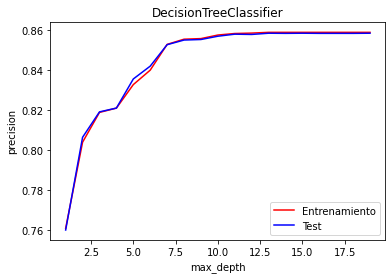


   importances_mean  importances_std       feature
1          0.082547         0.001503  Relationship
2          0.067070         0.000498  Capital_Gain
0          0.065071         0.000822     Education
3          0.020037         0.000497  Capital_Loss


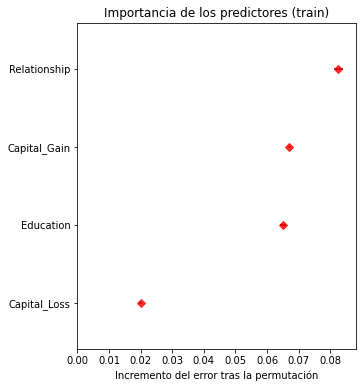

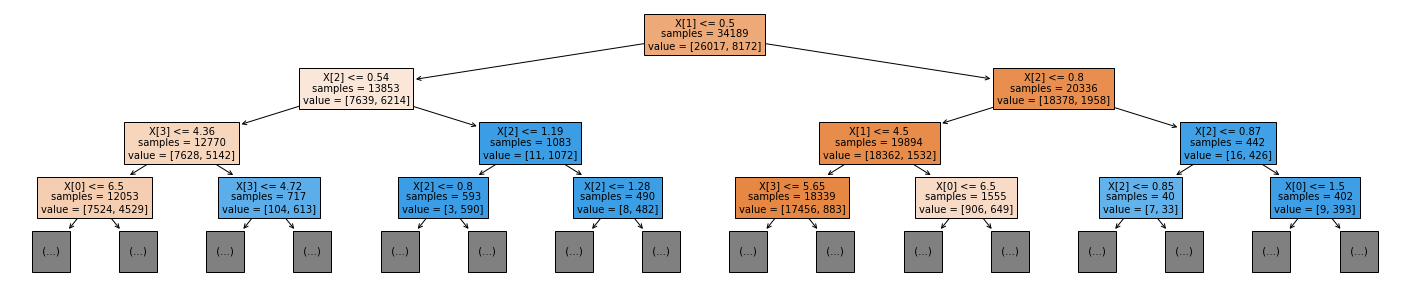

In [ ]:
train_prec = []
eval_prec = []
max_deep_list = list(range(1, 20))

for deep in max_deep_list:
    tree_model = DecisionTreeClassifier(max_depth=deep,criterion='gini', min_samples_split=36,min_samples_leaf=4)
    tree_model.fit(x_train, y_train)
    train_prec.append(tree_model.score(x_train, y_train))
    eval_prec.append(tree_model.score(x_test, y_test))


tree_model = DecisionTreeClassifier(max_depth = 13, min_samples_split= 36, min_samples_leaf=4)
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)

score_pred = metrics.accuracy_score(y_test, y_pred)
print("Metrica en Test accuracy", score_pred)

print("\nConfusion_matrix normalize\n",confusion_matrix(y_test,y_pred,normalize='true'),"\n\nConfusion_matrix\n",confusion_matrix(y_test,y_pred))
print("\nclassification_report\n",classification_report(y_test,y_pred,))

# graficar los resultados.
graficarAccuracy(max_deep_list,train_prec,eval_prec,'DecisionTreeClassifier','max_depth')

print()
#print(pd.Series(tree_model.feature_importances_,index=values.columns).sort_values(ascending=False))

print(feature_importance(tree_model, x_train, y_train))

fig, ax = plt.subplots(figsize=(25, 5))
plot = plot_tree(
            decision_tree = tree_model,
            max_depth     = 3,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

##RandomForest

In [ ]:
values = df_pre.drop(columns=['Target','Race','Sex','Country'])#
target = df_pre['Target']
x_train, x_test, y_train, y_test = train_test_split(values, target, test_size=0.30, random_state=0)
print(x_train.shape, x_test.shape)

(34189, 10) (14653, 10)


Metrica en Test accuracy 0.8673309219954958

Confusion_matrix normalize
 [[0.94568145 0.05431855]
 [0.38093883 0.61906117]] 

Confusion_matrix
 [[10533   605]
 [ 1339  2176]]

classification_report
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     11138
           1       0.78      0.62      0.69      3515

    accuracy                           0.87     14653
   macro avg       0.83      0.78      0.80     14653
weighted avg       0.86      0.87      0.86     14653



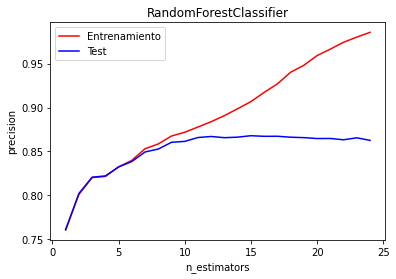

,importances_mean,importances_std,feature
6,0.105520,0.001499,Relationship
3,0.098084,0.000918,Education
0,0.094581,0.001464,Age
7,0.083271,0.000676,Capital_Gain
5,0.081747,0.001279,Occupation
9,0.078003,0.000854,Hours_per_week
2,0.056828,0.000938,fnlwgt
4,0.052989,0.001271,Martial_Status
1,0.040553,0.000950,Workclass
8,0.029874,0.000340,Capital_Loss


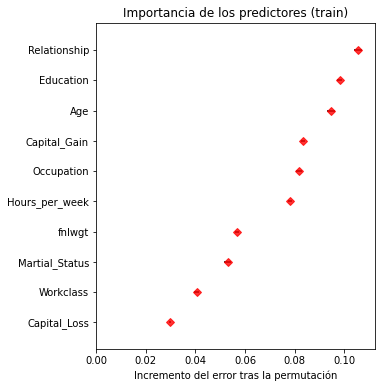

In [ ]:
train_prec = []
eval_prec = []
max_deep_list = list(range(1, 25))

for deep in max_deep_list:
    forest_model = RandomForestClassifier(n_estimators=70,max_depth=deep)
    forest_model.fit(x_train, y_train)
    train_prec.append(forest_model.score(x_train, y_train))
    eval_prec.append(forest_model.score(x_test, y_test))


forest_model = RandomForestClassifier(n_estimators=70,max_depth=17)
forest_model.fit(x_train, y_train)
y_pred = forest_model.predict(x_test)

score_pred = metrics.accuracy_score(y_test, y_pred)
print("Metrica en Test accuracy", score_pred)

print("\nConfusion_matrix normalize\n",confusion_matrix(y_test,y_pred,normalize='true'),"\n\nConfusion_matrix\n",confusion_matrix(y_test,y_pred))
print("\nclassification_report\n",classification_report(y_test,y_pred,))

# graficar los resultados.
graficarAccuracy(max_deep_list,train_prec,eval_prec,'RandomForestClassifier','n_estimators')
#print(pd.Series(forest_model.feature_importances_,index=values.columns).sort_values(ascending=False))
feature_importance(forest_model, x_train, y_train)

## KNN

In [ ]:
values = df_pre.drop(columns=['Target','Sex','Race','fnlwgt','Country','Capital_Loss','Hours_per_week'])
target = df_pre['Target']
x_train, x_test, y_train, y_test = train_test_split(values, target, test_size=0.30, random_state=0)
print(x_train.shape, x_test.shape)

(34189, 7) (14653, 7)


Metrica en Test accuracy 0.8396915307445574

Confusion_matrix normalize
 [[0.92197881 0.07802119]
 [0.42105263 0.57894737]] 

Confusion_matrix
 [[10269   869]
 [ 1480  2035]]

classification_report
               precision    recall  f1-score   support

           0       0.87      0.92      0.90     11138
           1       0.70      0.58      0.63      3515

    accuracy                           0.84     14653
   macro avg       0.79      0.75      0.77     14653
weighted avg       0.83      0.84      0.83     14653



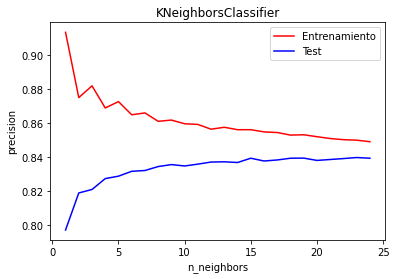

In [ ]:
train_prec =  []
eval_prec = []    
max_k_list = list(range(1, 25))

for K in max_k_list:
  knn_model = KNeighborsClassifier(n_neighbors = K)
  knn_model.fit(x_train, y_train)
  train_prec.append(knn_model.score(x_train, y_train))
  eval_prec.append(knn_model.score(x_test, y_test))

knn_model = KNeighborsClassifier(n_neighbors = 23)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

score_pred = metrics.accuracy_score(y_test, y_pred)
print("Metrica en Test accuracy", score_pred)

print("\nConfusion_matrix normalize\n",confusion_matrix(y_test,y_pred,normalize='true'),"\n\nConfusion_matrix\n",confusion_matrix(y_test,y_pred))
print("\nclassification_report\n",classification_report(y_test,y_pred,))

# graficar los resultados.
graficarAccuracy(max_k_list,train_prec,eval_prec,'KNeighborsClassifier','n_neighbors')
#print(pd.Series(knn_model.feature_importances_,index=values.columns).sort_values(ascending=False))
feature_importance(knn_model, x_train, y_train)

#Selección de modelo

##Validación cruzada
Los métodos de validación, también conocidos como resampling, son estrategias que permiten estimar la capacidad predictiva de los modelos cuando se aplican a nuevas observaciones, haciendo uso únicamente de los datos de entrenamiento. La idea en la que se basan todos ellos es la siguiente: el modelo se ajusta empleando un subconjunto de observaciones del conjunto de entrenamiento y se evalúa (calcular una métrica que mida cómo de bueno es el modelo, por ejemplo, accuracy) con las observaciones restantes. Este proceso se repite múltiples veces y los resultados se agregan y promedian.

In [ ]:
kf = KFold(n_splits = 7)
scores_tree_model = cross_val_score(tree_model, x_train, y_train, cv=kf, scoring="accuracy")
scores_forest_model = cross_val_score(forest_model, x_train, y_train, cv=kf, scoring="accuracy")
scores_kNN_model = cross_val_score(knn_model, x_train, y_train, cv=kf, scoring="accuracy")

print('Decision tree')
print("Metricas cross_validation", scores_tree_model)
print("Media de cross_validation", scores_tree_model.mean())

print('\n\nRandom forest')
print("Metricas cross_validation", scores_forest_model)
print("Media de cross_validation", scores_forest_model.mean())

print('\n\nKNN')
print("Metricas cross_validation", scores_kNN_model)
print("Media de cross_validation", scores_kNN_model.mean())

Decision tree
Metricas cross_validation [0.85076766 0.85974611 0.84602785 0.84602785 0.84131859 0.84438984
 0.85974611]
Media de cross_validation 0.8497177147637741


Random forest
Metricas cross_validation [0.86489253 0.86916462 0.86425061 0.86343161 0.86343161 0.86036036
 0.87059787]
Media de cross_validation 0.8651613170548688


KNN
Metricas cross_validation [0.82988741 0.83353808 0.82985258 0.82985258 0.82166257 0.82739558
 0.84049959]
Media de cross_validation 0.8303840561773009


#Conclusión

El mejor modelo que nos dio es el ramdon forest para este dataset modificamos en caso del arbol y el bosque los parametros de cantidad minima de feature, profundidad del arbol y seleccionamos los feature mas representativos para cada modelo pero conseguimos el mejor accuracy de 87% con el random forest quedandose por poco el arbol de desicion sin embargo hay que evaluar por velosidad que tan factible es la diferencia de -1% entre uno y el otro ya que el arbol de decision tiene una respuesta mas rapida.

En caso de KNN es el que nos dio peor corrimos desde 1 hasta 25 neigboards y identificamos que el mejor era con 23 pero sigue entando inclusive por debajo del arbol de decision ademas que de los 3 es el mas lento en poder ejecutar las opeciones de prediccion y entrenamiento por lo que queda descartado.

Por factor de tiempo no nos dio tiempo de probar normalizando los datos para ver si tenia un efecto positivo y ademas en caso de los valores que imputamos que era feature categoricos los aplicamos por moda no esta testeado aun si ubieramos eliminados esas filas conseguiamos mejor resultado ya que tan solo representan el 5% de los datos.

Nuestra decision es usar random forest para tener mayor presicion como muestras las graficas y demas metricas